In [1]:
%matplotlib inline

In [2]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['figure.figsize'] = '7, 5'

In [3]:
def make_figure_axes(x, y, fig_number=1, fig_size=8):
    '''
    Creates a set of 3 axes to plot 2D function + marginals
    '''
    # determine max size
    size_x = x.max() - x.min()
    size_y = y.max() - y.min()
    max_size = max(size_x, size_y)
    min_size = min(size_x, size_y)

    if size_x >= size_y:
        fig_size_x = fig_size
        fig_size_y = (0.12 * fig_size_x +
                      0.65 * fig_size_x * min_size / max_size +
                      0.02 * fig_size_x +
                      0.18 * fig_size_x +
                      0.03 * fig_size_x)
        rect_main = [0.12,
                     0.12 * fig_size_x / fig_size_y,
                     0.65,
                     0.65 * fig_size_x * min_size / max_size / fig_size_y]
        rect_x = [0.12, ((0.12 + 0.65 * min_size / max_size + 0.02) *
                         fig_size_x / fig_size_y),
                  0.65, 0.18 * fig_size_x / fig_size_y]
        rect_y = [0.79, 0.12 * fig_size_x / fig_size_y,
                  0.18, 0.65 * fig_size_x * min_size / max_size / fig_size_y]
    else:
        fig_size_y = fig_size
        fig_size_x = (0.12 * fig_size_y +
                      0.65 * fig_size_y * min_size / max_size +
                      0.02 * fig_size_y +
                      0.18 * fig_size_y +
                      0.03 * fig_size_y)
        rect_main = [0.12 * fig_size_y / fig_size_x,
                     0.12,
                     0.65 * fig_size_y * min_size / max_size / fig_size_x,
                     0.65]
        rect_x = [0.12 * fig_size_y / fig_size_x, 0.79,
                  0.65 * fig_size_y * min_size / max_size / fig_size_x, 0.18]
        rect_y = [((0.12 + 0.65 * min_size / max_size + 0.02) *
                   fig_size_y / fig_size_x), 0.12,
                  0.18 * fig_size_y / fig_size_x, 0.65]

    fig = plt.figure(fig_number, figsize=(fig_size_x, fig_size_y))
    fig.clf()

    ax_main = fig.add_axes(rect_main)
    ax_marginal_x = fig.add_axes(rect_x, xticklabels=[])
    ax_marginal_y = fig.add_axes(rect_y, yticklabels=[])

    return ax_main, ax_marginal_x, ax_marginal_y


def plot_distribution(x, y, z, cmap='viridis'):
    x_limits = (x.min(), x.max())
    y_limits = (y.min(), y.max())

    ax_main, ax_marginal_x, ax_marginal_y = make_figure_axes(x, y)
    ax_main.pcolormesh(x, y, z, cmap=cmap)

    marginal_x = np.sum(z, axis=1)
    ax_marginal_x.plot(x[:,0], marginal_x)
    [l.set_rotation(-90) for l in ax_marginal_y.get_xticklabels()]

    marginal_y = np.sum(z, axis=0)
    ax_marginal_y.plot(marginal_y, y[0])

    ax_main.set_xlim(x_limits)
    ax_main.set_ylim(y_limits)

    ax_marginal_x.set_xlim(x_limits)
    ax_marginal_y.set_ylim(y_limits)
    return ax_main, ax_marginal_x, ax_marginal_y

# Gaussiana N-dimensional

Demo en 2D:
$$ mu = \begin{bmatrix}
0.5\\
1.
\end{bmatrix}$$

$$ \Sigma = \begin{bmatrix}
1 & 0.5\\ 
0.5 & 1
\end{bmatrix}$$

In [4]:
x, y = np.mgrid[-3:3:99j, -3:4:99j]

In [5]:
print y

[[-3.         -2.92857143 -2.85714286 ...,  3.85714286  3.92857143  4.        ]
 [-3.         -2.92857143 -2.85714286 ...,  3.85714286  3.92857143  4.        ]
 [-3.         -2.92857143 -2.85714286 ...,  3.85714286  3.92857143  4.        ]
 ..., 
 [-3.         -2.92857143 -2.85714286 ...,  3.85714286  3.92857143  4.        ]
 [-3.         -2.92857143 -2.85714286 ...,  3.85714286  3.92857143  4.        ]
 [-3.         -2.92857143 -2.85714286 ...,  3.85714286  3.92857143  4.        ]]


In [6]:
def Gauss2D(x, y, mu, sigma_pars):
    mu_x, mu_y = mu
    sigma_x, sigma_y, rho = sigma_pars
    A = 1 / (2 * np.pi * 1. * 1. * np.sqrt(1-0.5**2))
    B = np.exp(-((x - mu_x)**2 / sigma_x**2 + (y - mu_y)**2 / sigma_y**2 - 
                 2 * rho * (x - mu_x) * (y - mu_y) / sigma_x / sigma_y) / (2 * (1 - rho**2)) )
    return A * B

In [7]:
ni, nj = x.shape
g2d = np.zeros((ni, nj))
mu = [0.5, 1.]
sigma_pars = [1, 1, 0.9]
for i in range(ni):
    for j in range(nj):
        g2d[i,j] = Gauss2D(x[i,0], y[0,j], mu, sigma_pars)

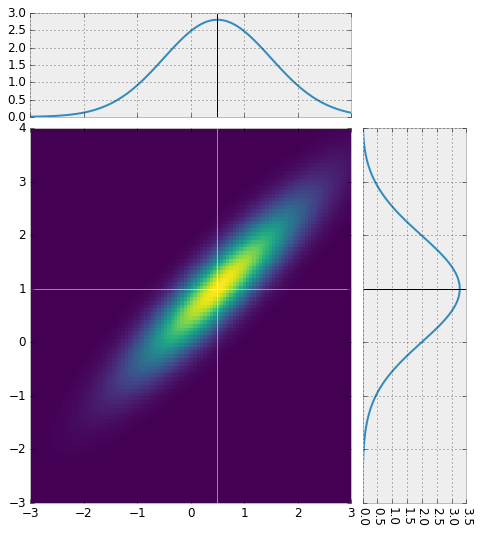

In [8]:
ax1, ax2, ax3 = plot_distribution(x, y, g2d)
ax1.axvline(mu[0], lw=0.5, color='w')
ax1.axhline(mu[1], lw=0.5, color='w')
ax2.axvline(mu[0], lw=1., color='k')
ax3.axhline(mu[1], lw=1., color='k')


## En gral para los priors, usaremos gaussianas en que las variables son independientes

In [9]:
mu = [0.5, 1.]
sigma_pars = [1, 1, 0] # Notar el 0 al final, significa rho=0 => no hay covarianza
for i in range(ni):
    for j in range(nj):
        g2d[i,j] = Gauss2D(x[i,0], y[0,j], mu, sigma_pars)

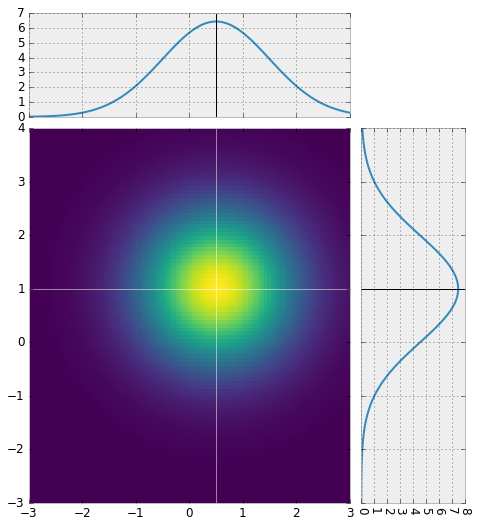

In [10]:
ax1, ax2, ax3 = plot_distribution(x, y, g2d)
ax1.axvline(mu[0], lw=0.5, color='w')
ax1.axhline(mu[1], lw=0.5, color='w')
ax2.axvline(mu[0], lw=1., color='k')
ax3.axhline(mu[1], lw=1., color='k')

# Modelamiento lineal Bayesiano

Modelaremos un set de datos que proviene del siguiente modelo:

$$ y_i = 2.5 + 3.4 * x_i + \epsilon$$

con $\epsilon\sim N(0, 1.5^2)$.

Primero creamos el set de datos que queremos modelar.

In [11]:
np.random.seed(44)
N = 20
x_sample = np.random.uniform(3, 6, size=N)
y_sample = 2.5 + 3.4 * x_sample + np.random.normal(0, 1.5, size=N)

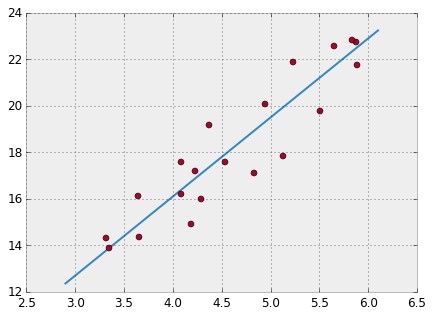

In [12]:
x = np.linspace(2.9, 6.1, 10)
y = 2.5 + 3.4 * x
plt.plot(x, y, ls='-', marker='None', mfc='None')
plt.plot(x_sample, y_sample, ls='None', marker='o')

# Modelamiento Bayesiano

## Prior:

In [13]:
def prior(beta, params):
    beta0, beta1 = beta
    mu0, sigma0, mu1, sigma1 = params
    S = -1. / 2 * ((beta0 - mu0)**2 / sigma0**2 + (beta1 - mu1)**2 / sigma1**2)
    P = np.exp(S) / (2 * np.pi * sigma0 * sigma1)
    return P

def fill_prior(beta0_grid, beta1_grid, prior_params):
    output = np.zeros(beta0_grid.shape)
    ni, nj = beta0_grid.shape
    for i in range(ni):
        for j in range(nj):
            output[i, j] = prior([beta0_grid[i,j], beta1_grid[i,j]], prior_params)
    return output

In [14]:
beta0_grid, beta1_grid = np.mgrid[1:4:99j, 2:5:99j]
beta_prior_pars = [2, 1, 3, 1]
prior_grid = fill_prior(beta0_grid, beta1_grid, beta_prior_pars)

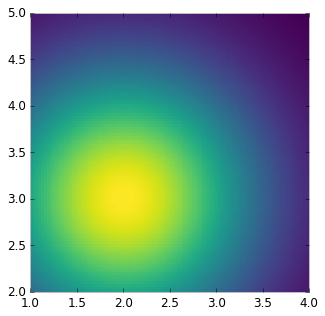

In [15]:
plt.pcolormesh(beta0_grid, beta1_grid, prior_grid, cmap='viridis')
plt.gca().set_aspect('equal')

In [16]:
def likelihood(beta, data):
    beta0, beta1 = beta
    x, y = data
    try:
        N = len(x)
    except:
        N = 1
    S = np.sum((y - beta0 - beta1 * x)**2)
    L = (2 * np.pi * 1.5**2)**(-N / 2.) * np.exp(-S / 2 / 1.5**2)
    return L

def fill_likelihood(beta0_grid, beta1_grid, data):
    output = np.zeros(beta0_grid.shape)
    ni, nj = beta0_grid.shape
    for i in range(ni):
        for j in range(nj):
            output[i, j] = likelihood([beta0_grid[i,j], beta1_grid[i,j]], data)
    return output

In [17]:
likelihood_grid = fill_likelihood(beta0_grid, beta1_grid, [x, y])
post_grid = likelihood_grid * prior_grid

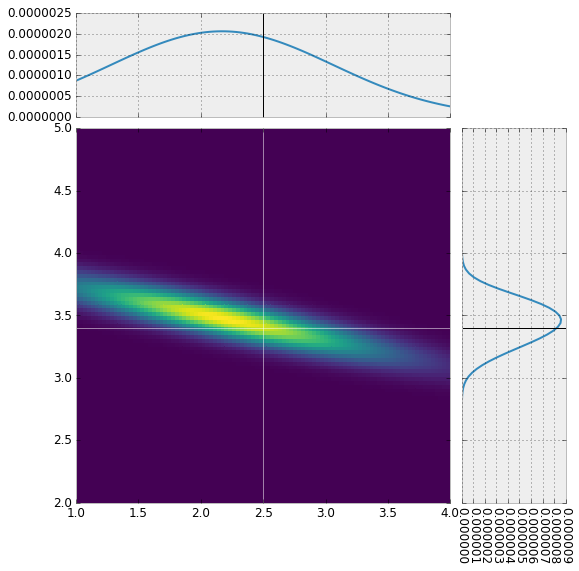

In [18]:
ax1, ax2, ax3 = plot_distribution(beta0_grid, beta1_grid, post_grid)
ax1.axvline(2.5, lw=0.5, color='w')
ax1.axhline(3.4, lw=0.5, color='w')
ax2.axvline(2.5, lw=1., color='k')
ax3.axhline(3.4, lw=1., color='k')

# Usando un prior MENOS informativo:

Notar que se usa $\sigma^2=100$ >>> `beta_prior_pars = [1, 100, 10, 100]`

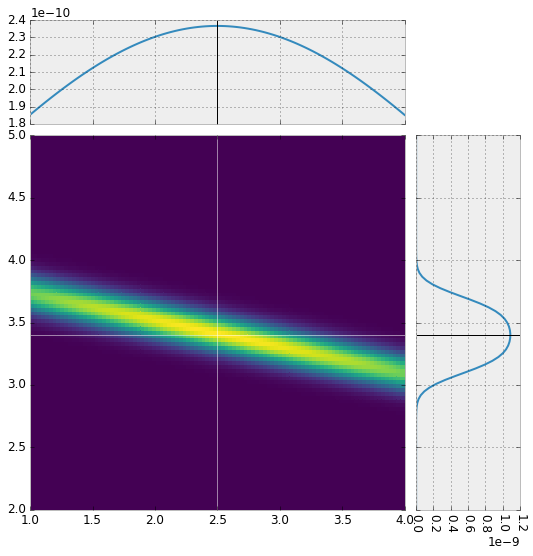

In [19]:
beta_prior_pars = [1, 100, 10, 100]
prior_grid = fill_prior(beta0_grid, beta1_grid, beta_prior_pars)
# no necesitamos re-calcular la likelihood
post_grid = likelihood_grid * prior_grid

ax1, ax2, ax3 = plot_distribution(beta0_grid, beta1_grid, post_grid)
ax1.axvline(2.5, lw=0.5, color='w')
ax1.axhline(3.4, lw=0.5, color='w')
ax2.axvline(2.5, lw=1., color='k')
ax3.axhline(3.4, lw=1., color='k')

# Usando un prior MAS informativo:

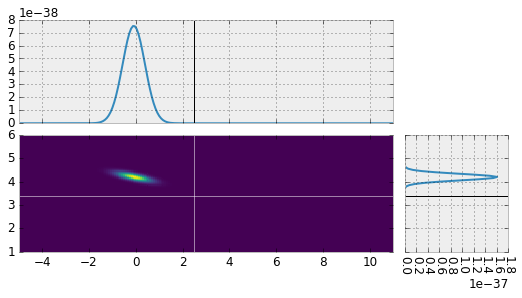

In [30]:
# beta_prior_pars = [2.5, 0.5, 3.4, 0.5]
beta_prior_pars = [1, 0.5, 10, 0.5]

prior_grid = fill_prior(beta0_grid, beta1_grid, beta_prior_pars)
# no necesitamos re-calcular la likelihood
post_grid = likelihood_grid * prior_grid

ax1, ax2, ax3 = plot_distribution(beta0_grid, beta1_grid, post_grid)
ax1.axvline(2.5, lw=0.5, color='w')
ax1.axhline(3.4, lw=0.5, color='w')
ax2.axvline(2.5, lw=1., color='k')
ax3.axhline(3.4, lw=1., color='k')

# Sequential Learning

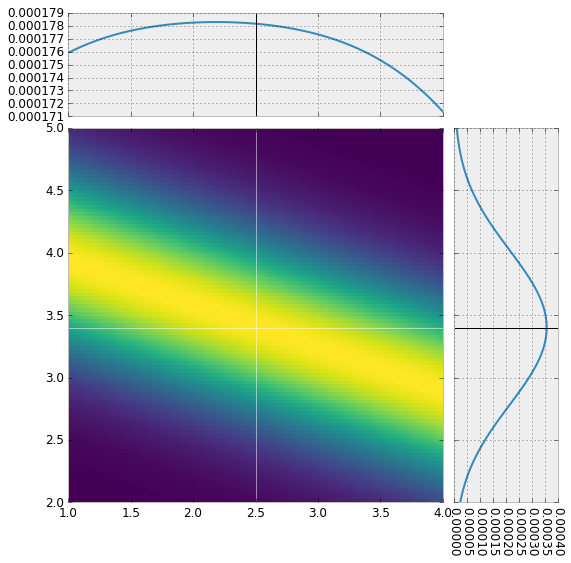

In [21]:
# Partimos un prior poco informativo
beta_prior_pars = [1, 100, 10, 100]
prior_grid = fill_prior(beta0_grid, beta1_grid, beta_prior_pars)

# Calculamos la likelihood con el PRIMER punto de la muestra solamente
likelihood_grid = fill_likelihood(beta0_grid, beta1_grid, [x[0], y[0]])

post_grid = likelihood_grid * prior_grid

ax1, ax2, ax3 = plot_distribution(beta0_grid, beta1_grid, post_grid)
ax1.axvline(2.5, lw=0.5, color='w')
ax1.axhline(3.4, lw=0.5, color='w')
ax2.axvline(2.5, lw=1., color='k')
ax3.axhline(3.4, lw=1., color='k')

## Ahora la prob posterior se transforma en el prior

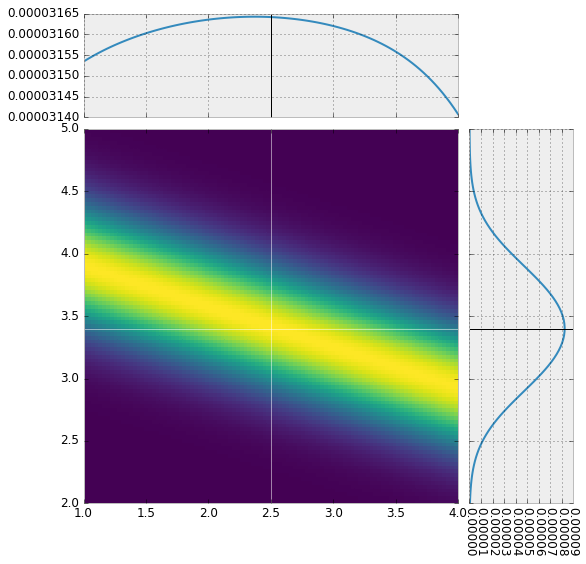

In [22]:
# Calculamos la likelihood con el SEGUNDO punto de la muestra solamente
likelihood_grid = fill_likelihood(beta0_grid, beta1_grid, [x[1], y[1]])

# Notar la recursion siguiente
post_grid = likelihood_grid * post_grid

ax1, ax2, ax3 = plot_distribution(beta0_grid, beta1_grid, post_grid)
ax1.axvline(2.5, lw=0.5, color='w')
ax1.axhline(3.4, lw=0.5, color='w')
ax2.axvline(2.5, lw=1., color='k')
ax3.axhline(3.4, lw=1., color='k')

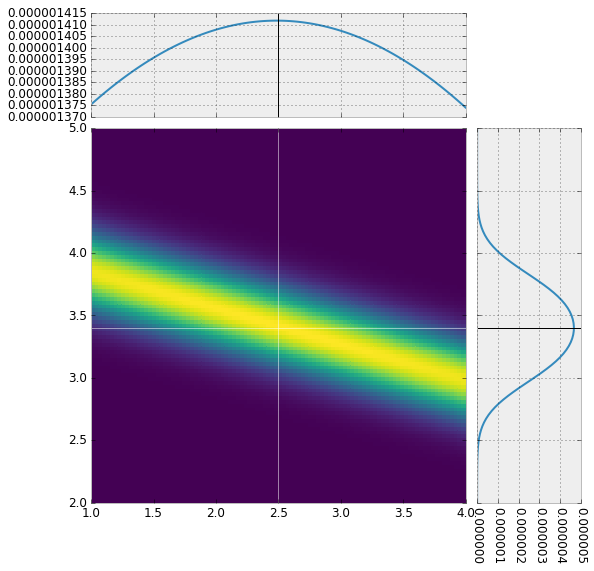

In [23]:
# Calculamos la likelihood con LOS SIGUIENTES 2 puntos de la muestra solamente
likelihood_grid = fill_likelihood(beta0_grid, beta1_grid, [x[2:4], y[2:4]])

# Notar la recursion siguiente
post_grid = likelihood_grid * post_grid

ax1, ax2, ax3 = plot_distribution(beta0_grid, beta1_grid, post_grid)
ax1.axvline(2.5, lw=0.5, color='w')
ax1.axhline(3.4, lw=0.5, color='w')
ax2.axvline(2.5, lw=1., color='k')
ax3.axhline(3.4, lw=1., color='k')

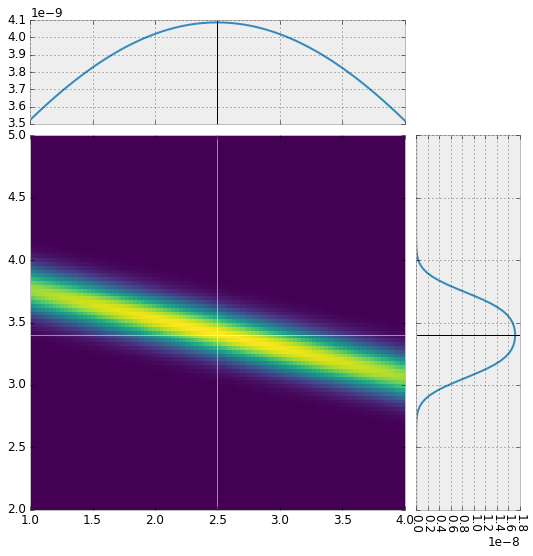

In [24]:
# Calculamos la likelihood con LOS SIGUIENTES 4 puntos de la muestra solamente
likelihood_grid = fill_likelihood(beta0_grid, beta1_grid, [x[4:8], y[4:8]])

# Notar la recursion siguiente
post_grid = likelihood_grid * post_grid

ax1, ax2, ax3 = plot_distribution(beta0_grid, beta1_grid, post_grid)
ax1.axvline(2.5, lw=0.5, color='w')
ax1.axhline(3.4, lw=0.5, color='w')
ax2.axvline(2.5, lw=1., color='k')
ax3.axhline(3.4, lw=1., color='k')

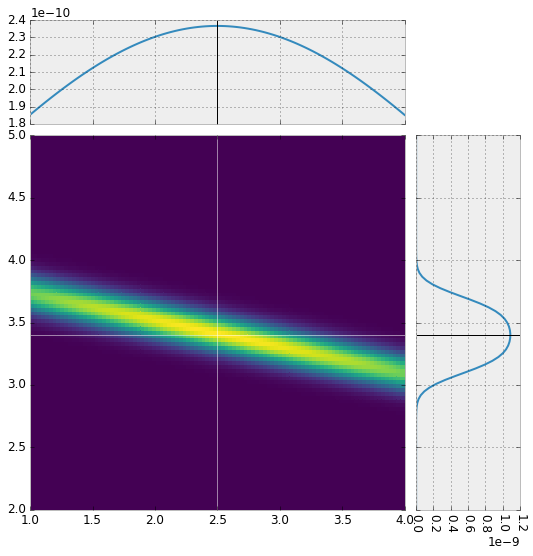

In [25]:
# Calculamos la likelihood con LOS PUNTOS RESTANTES de la muestra solamente
likelihood_grid = fill_likelihood(beta0_grid, beta1_grid, [x[8:], y[8:]])

# Notar la recursion siguiente
post_grid = likelihood_grid * post_grid

ax1, ax2, ax3 = plot_distribution(beta0_grid, beta1_grid, post_grid)
ax1.axvline(2.5, lw=0.5, color='w')
ax1.axhline(3.4, lw=0.5, color='w')
ax2.axvline(2.5, lw=1., color='k')
ax3.axhline(3.4, lw=1., color='k')

# Normalizacion

Los valores de las probabilidades hasta ahora no tienen significado, ya que requieren normalización. En un caso real, debemos calcular la integral de la probabilidad posterior para estimar la normalizacion.

Por ahora lo haremos de manera muy simple, definiendo una grilla suficientemente grande para contener la mayor parte de la probabilidad y luego sumaremos en 2D. El cálculo de esta integral es, de hecho una de las mayores dificultades en la aplicacion de estadistica Bayesiana.

(<matplotlib.axes._axes.Axes at 0x10b829590>,
 <matplotlib.axes._axes.Axes at 0x10c8b7110>)

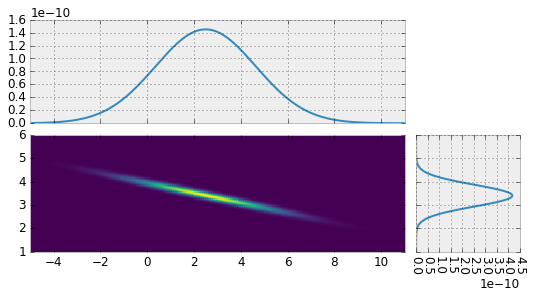

In [26]:
beta0_grid, beta1_grid = np.mgrid[-5:11:201j, 1:6:101j] # Grilla suficientemente grande
dx = 16 / 200
dy = 5 / 100

prior_grid = fill_prior(beta0_grid, beta1_grid, [1, 100, 10, 100])
likelihood_grid = fill_likelihood(beta0_grid, beta1_grid, [x, y])

plot_distribution(beta0_grid, beta1_grid, likelihood_grid * prior_grid)

In [27]:
# la normalizacion como la integral simple de esta funcion den 2D
P_E = np.sum(likelihood_grid * prior_grid) * dx * dy
print P_E

3.89070428033e-11


# Ahora podemos calcular la probabilidad marginal del parametro $\beta_1$

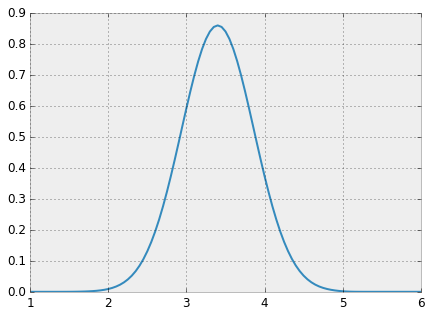

In [28]:
prob_beta1 = np.sum(likelihood_grid * prior_grid, axis=0) * dx / P_E
plt.plot(beta1_grid[0], prob_beta1)

In [29]:
from scipy.integrate import trapz
print(trapz(prob_beta1, beta1_grid[0])) # Chequeo simple de que la probabilidad total es 1.

1.0
